In [3]:
import pandas as pd
data = pd.read_csv("iris.csv", header=None)



!!!!!!!!!!!!!!!!!!!!! K = 1 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
TP + TN =  59
Total Test Records =  60
Accuracy =  0.9833333333333333  =  0.9833333333333333
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


!!!!!!!!!!!!!!!!!!!!! K = 3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
TP + TN =  59
Total Test Records =  60
Accuracy =  0.9833333333333333  =  0.9833333333333333
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


!!!!!!!!!!!!!!!!!!!!! K = 5 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
TP + TN =  58
Total Test Records =  60
Accuracy =  0.9666666666666667  =  0.9666666666666667
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


!!!!!!!!!!!!!!!!!!!!! K = 7 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
TP + TN =  58
Total Test Records =  60
Accuracy =  0.9666666666666667  =  0.9666666666666667
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


!!!!!!!!!!!!!!!!!!!!! K = 9 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
TP + TN =  59
Total Test Records =  60
Accuracy =  0.9833333333333333  =  0.9833333333333333
!!!

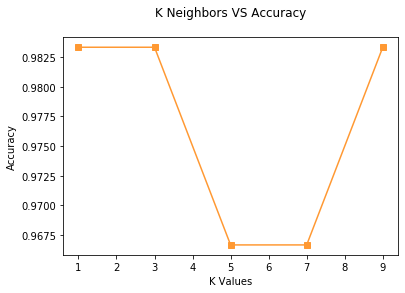


The Knee Point is:  1


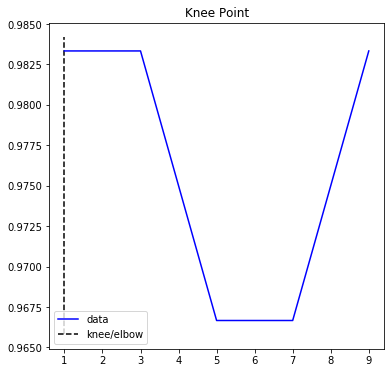

In [4]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as pt
from kneed import KneeLocator

input_data = data.drop([data.columns[4]], axis='columns')
target_data = data[4].values

#print(input_data)
#print(target_data)

input_train, input_test, target_train, target_test = model_selection.train_test_split(input_data, target_data, test_size=0.4, random_state=1, stratify=target_data)

#print(input_train)
#print(target_train)
#print(input_test)
#print(target_test)

N = len(target_test)
k = 1
kvals = []
accvals = []
while (k <= 9):
    print("\n\n!!!!!!!!!!!!!!!!!!!!! K = %d !!!!!!!!!!!!!!!!!!!!!!!!!!!!!" %(k))
    
    classify = KNeighborsClassifier(n_neighbors = k)
    classify.fit(input_train, target_train)
    
    predicted_results = classify.predict(input_test)

    i = 0
    true = 0
    for x in input_test.values:
#        print(x)
        x = x.reshape(1,len(x))
        pred = classify.predict(x)
#        print(pred)
        if (pred == target_test[i]):
            true = true + 1
#            print("True\n")
#        else:
#            print("False\n")
        i = i + 1

    acc = true / N
    accuracy = classify.score(input_test, target_test)
    
    kvals.append(k)
    accvals.append(accuracy)
    
    print("TP + TN = ", true)
    print("Total Test Records = ",N)
    print("Accuracy = ",acc," = ",accuracy)
    
    k = k + 2
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    
    
#pt.plot(accvals, kvals, '-p')
pt.plot(kvals, accvals, '-s', color = "#FF9933")
pt.xlabel("K Values")
pt.ylabel("Accuracy")
pt.title("K Neighbors VS Accuracy\n")
kp = KneeLocator(kvals, accvals)
pt.show()

print("\nThe Knee Point is: ",kp.knee)

kp.plot_knee()
